In [2]:
from pathlib import Path
import IPython
import libsbgnpy.libsbgn as libsbgn
from IPython.core.display import HTML
from IPython.display import Image
from libsbgnpy.libsbgnTypes import ArcClass, GlyphClass, Language, Orientation
from pygments import highlight
from pygments.formatters import HtmlFormatter
from pygments.lexers import PythonLexer
from combine_notebooks import RESULTS_DIR

In [3]:
def pprint_xml(xml_str: str) -> None:
    """Create highlighted xml."""
    IPython.display.display(
        HTML(
            '<style type="text/css">{}</style>{}'.format(
                HtmlFormatter().get_style_defs(".highlight"),
                highlight(xml_str, PythonLexer(), HtmlFormatter()),
            )
        )
    )

SBGN rendered: /home/vboxuser/Documents/compbiolibs/combine-notebooks/results/hello_world_sbgn.png


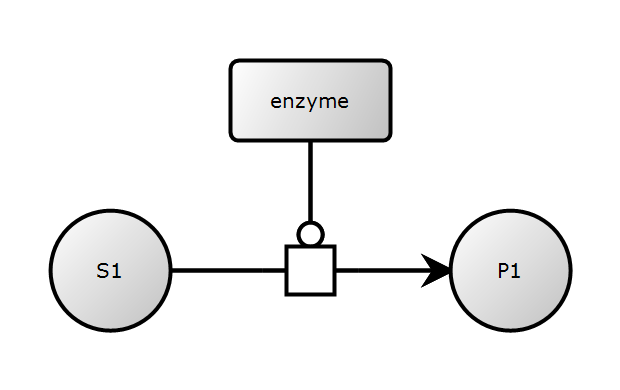

In [5]:
# create empty sbgn
sbgn: libsbgn.sbgn = libsbgn.sbgn()

# create map, set language and set in sbgn
map = libsbgn.map()
map.set_language(Language.PD)
sbgn.set_map(map)

# create some glyphs
# glyphs with labels
g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id="glyph0")
g.set_label(libsbgn.label(text="S1"))
g.set_bbox(libsbgn.bbox(y="105.0", x="25.0", h="60.0", w="60.0"))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.MACROMOLECULE, id="glyph2")
g.set_label(libsbgn.label(text="enzyme"))
g.set_bbox(libsbgn.bbox(y="30.0", x="115.0", h="40.0", w="80.0"))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.PROCESS, id="glyph3")
g.set_bbox(libsbgn.bbox(y="123.0", x="143.0", h="24.0", w="24.0"))
g.add_port(libsbgn.port(y="135.0", x="131.0", id="glyph3.1"))
g.add_port(libsbgn.port(y="135.0", x="179.0", id="glyph3.2"))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id="glyph1")
g.set_label(libsbgn.label(text="P1"))
g.set_bbox(libsbgn.bbox(y="105.0", x="225.0", h="60.0", w="60.0"))
map.add_glyph(g)

# Add arcs linking the glyphs together
a = libsbgn.arc(
    class_=ArcClass.CONSUMPTION,
    target="glyph3.1",
    source="glyph0",
    id="arc0",
)
a.set_start(libsbgn.startType(y="135.0", x="85.0"))
a.set_end(libsbgn.endType(y="135.0", x="131.0"))
map.add_arc(a)

a = libsbgn.arc(
    class_=ArcClass.CATALYSIS,
    target="glyph3",
    source="glyph2",
    id="arc1",
)
a.set_start(libsbgn.startType(y="70.0", x="155.0"))
a.set_end(libsbgn.endType(y="123.0", x="155.0"))
map.add_arc(a)

a = libsbgn.arc(
    class_=ArcClass.PRODUCTION,
    target="glyph1",
    source="glyph3.2",
    id="arc2",
)
a.set_start(libsbgn.startType(y="135.0", x="179.0"))
a.set_end(libsbgn.endType(y="135.0", x="225.0"))
map.add_arc(a)

from combine_notebooks import RESULTS_DIR

sbgn_path = str(RESULTS_DIR) + "/hello_world_sbgn.sbgn"
f_out = sbgn_path
sbgn.write_file(f_out)

# render SBGN
from libsbgnpy import render

f_png: str = str(RESULTS_DIR) + '/hello_world_sbgn.png'
render.render_sbgn(sbgn, image_file=f_png, file_format="png")
Image(f_png, width=300)